In [3]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
csvfilename = "calculated_features/awe-awet_lpq.csv"
data = pd.read_csv(csvfilename)
X = data.drop('class', axis=1)  
y = data['class']

In [21]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v9207,v9208,v9209,v9210,v9211,v9212,v9213,v9214,v9215,v9216
0,87,44,45,46,46,68,0,0,0,1,...,1,1,1,0,0,2,0,0,1,0
1,88,49,44,44,44,68,1,0,0,0,...,0,1,0,0,2,0,0,0,0,0
2,84,44,44,46,46,72,2,4,1,2,...,0,0,0,1,1,1,2,1,1,1
3,85,46,45,44,44,68,1,0,0,0,...,0,0,3,1,0,0,0,0,0,2
4,85,44,44,47,45,68,0,0,0,2,...,0,0,1,0,0,0,0,2,1,0


In [22]:
X.shape

(1000, 9216)

In [23]:
X_ = X.values
X_[0:5,0:5]

array([[87, 44, 45, 46, 46],
       [88, 49, 44, 44, 44],
       [84, 44, 44, 46, 46],
       [85, 46, 45, 44, 44],
       [85, 44, 44, 47, 45]])

In [24]:
scaler = MinMaxScaler(feature_range=[0, 1])
X_rescaled = scaler.fit_transform(X_)

In [25]:
X_rescaled[0:5,0:5]

array([[0.03658537, 0.        , 0.02173913, 0.10526316, 0.04      ],
       [0.04878049, 0.11111111, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.10526316, 0.04      ],
       [0.01219512, 0.04444444, 0.02173913, 0.        , 0.        ],
       [0.01219512, 0.        , 0.        , 0.15789474, 0.02      ]])

In [26]:
type(X_rescaled), len(X_rescaled)

(numpy.ndarray, 1000)

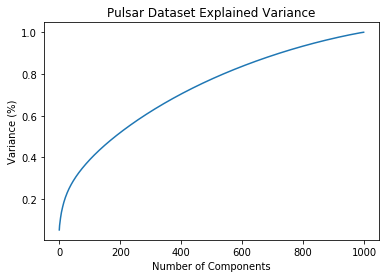

In [27]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [28]:
X_pca = pca.fit_transform(X_rescaled)
pca.explained_variance_ratio_

array([5.23478522e-02, 2.16370604e-02, 1.25040653e-02, 1.16924832e-02,
       1.09210651e-02, 9.77813558e-03, 9.43342365e-03, 8.04680582e-03,
       7.09995220e-03, 6.83200743e-03, 6.26689121e-03, 6.15356730e-03,
       5.92457987e-03, 5.69858420e-03, 5.56431005e-03, 5.21596433e-03,
       4.92705941e-03, 4.69820061e-03, 4.56735849e-03, 4.44464770e-03,
       4.17290446e-03, 4.01136673e-03, 3.96980174e-03, 3.83991951e-03,
       3.79324872e-03, 3.63222670e-03, 3.51906738e-03, 3.43534143e-03,
       3.39233655e-03, 3.29212255e-03, 3.22028343e-03, 3.13906778e-03,
       3.09719126e-03, 2.95455380e-03, 2.92669332e-03, 2.84031835e-03,
       2.80982406e-03, 2.77784298e-03, 2.70799456e-03, 2.69380237e-03,
       2.64164526e-03, 2.55683281e-03, 2.54935807e-03, 2.54631309e-03,
       2.48233847e-03, 2.45424166e-03, 2.42022144e-03, 2.35935938e-03,
       2.34400341e-03, 2.31456811e-03, 2.29102348e-03, 2.25674237e-03,
       2.24148023e-03, 2.19632814e-03, 2.18188390e-03, 2.17556623e-03,
      

In [29]:
X_pca.shape

(1000, 1000)

In [32]:
X_pca[0][:45]
y[10]

2

In [40]:
def chiSquared(a,b):
    res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return res

def chiSquared2(a,b):
    #res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return 0.5*np.sum((a-b)**2/(a+b+1e-6))

def getMetrics(X,y):
    #data = pd.read_csv(csvfilename)
    #X = data.drop('class', axis=1)  
    #y = data['class']
    y_pred = np.zeros(data.shape[0])
    for i in range(len(X)):
        minimun = 1e+10;    
        for j in range (len(X)):
            res = chiSquared(X[i], X[j])
            if res < minimun and i != j:
                minimun = res
                y_pred[i] = y[j] 
                
    count = 0
    for i in range (len(y)):
        if y[i] == y_pred[i]:
            count = count + 1    
    msq = np.sqrt(mean_squared_error(y, y_pred))
    rank1 = count*100/len(y)
    res = 'MSR: '+ str(msq) + ' - Rank1: '+ str(rank1)    
    return res

In [41]:
print(getMetrics(X_pca,y))

/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


MSR: 41.66751732464991 - Rank1: 0.8


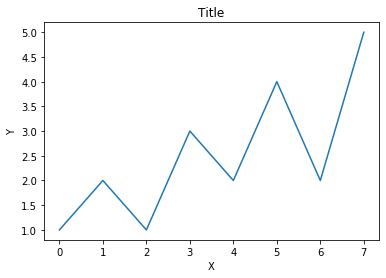

In [9]:
a = np.array([1,2,1,3,2,4,2,5])
plt.figure()
plt.plot(a)
plt.xlabel('X')
plt.ylabel('Y') #for each component
plt.title('Title')
plt.show()